# Demension Reduction
> real world problems involve a lot of features which make training extremely slow. 
* fortunaltely, in many cases, it's possible to reduce dimension of the problem
* PCA, Kernal PCA, LLE





## Dimension problem (curse of dimensionality) in data 
* higher dimension, instances are likely far away from each other.
  * meaning likely very sparse
  * also meaning new instance will far away from any training instances
    * making prediction less reliable
    * greater risk of overfitting
* naive solution for dimension problem => increasing size of training data.
  * however, not practical 
    * ex > for 100 features problem, sufficient size of data would be greater than a number of atoms in observable universe (WTF)
    

## Main approaches for Dimensionality reduction 
* Projection
* Manifold learning


### Projection
* training data in real world 
  * not spread out uniformly across all dimensions
  * so if there are the features with low variance within dataset, they can be removed by projecting the dataset to subspace (space with reduced dimension)
* not suitable in many cases 
  * **the subspace may twist and turn** 



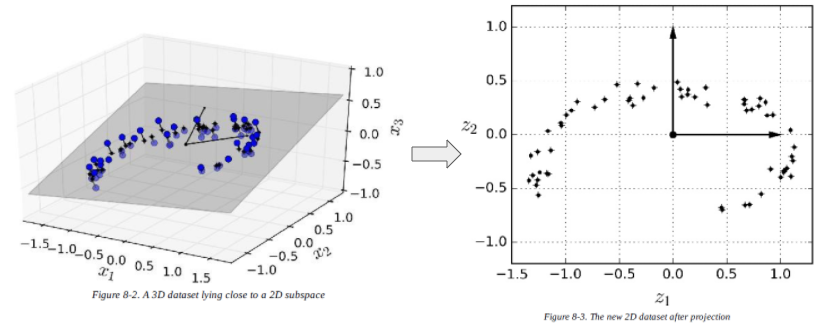

### Manifold learning
* manifold assumption
  * high dimensional problem can be reduced (or simplified) lower dimensional manifold (conceptually equivalent with projection) 
  * it's true very often.
  * and solution is simpler for lower dimension problem (which is not always true unfortunately)
  





### In a nutshell 
  * you can reduce the training data before training a model.
  * but have to be careful
    * not always better or simpler 
    
  

## PCA (**P**rincipal **C**omponent **A**nalysis)
* Most Popular dimension reduction algorithm
* Process
  1. identify hyperplane that matches the data most
    * preserving the variance == lose less information in dimension reduction
    * find principal component with SVD(singular value decomposition)
  2. project the data onto it
* Problem
* Compression & Decompression using PCA
  * obviously the data resulting from PCA has less size than original.
  * data can be recovered from PCA result using inverse transformation
> **To find principal component with SVD, all the training set should fit in memory**
  * incremental PCA 




In [5]:
from sklearn.datasets import load_digits

digit_data = load_digits()
input = digit_data['data']
label = digit_data['target']

In [25]:
# using numpy 

import numpy as np

x_centered = input - input.mean(axis=0)
U, s, V = np.linalg.svd(x_centered)
c1 = V.T[:,0]
W = V.T[:, :16]
x_dr = x_centered.dot(W)


In [36]:
from sklearn.decomposition import PCA

# calculate PCA for all input features 
pca = PCA(n_components = 64)
xx_dr = pca.fit_transform(input)

# variance propotion for each feature 
cumsum = np.cumsum(pca.explained_variance_ratio_) 

# find 0.95% variance point with cumulative sum of explained_variance_ratio 
d = np.argmax(cumsum >= 0.95) + 1

# simply do the same like below
pca = PCA(n_components = 0.95)
xx_dr = pca.fit_transform(input)
recovered = pca.inverse_transform(xx_dr)




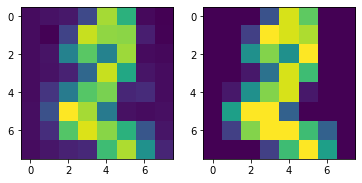

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[1].imshow(input[2].reshape(8,8))
ax[0].imshow(recovered[2].reshape(8,8))

plt.show()


### Incremental PCA



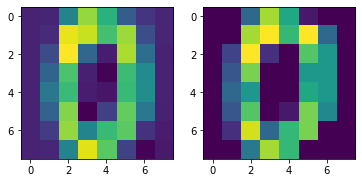

In [52]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=17)
for input_batch in np.array_split(input, n_batches):
  inc_pca.partial_fit(input_batch)

xx_rd = inc_pca.transform(input)
recovered = inc_pca.inverse_transform(xx_rd)

fig, ax = plt.subplots(1,2)
ax[1].imshow(input[0].reshape(8,8))
ax[0].imshow(recovered[0].reshape(8,8))

plt.show()


### Kernal PCA
* unsupervised learning algorithm
* no obvious performance measure (like explained variance ratio)
* so vialbe options to perform kernel PCA 
  * by performing hyper parameter search with pipeline
  * by calculate rmse between recovered and original


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

clf = Pipeline((
    ("kpca", KernelPCA(n_components=2)),
    ("tree", DecisionTreeClassifier())
))

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(input, label)

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


## LLE (**L**ocally **L**inear **E**mbedding)
* Process 
  1. iterating each instance to measure linear relations to closest neighbors (c.n)
  2. find low-dimensional representation of the training set
* Good at unrolling twisted manifold

In [65]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
xx_dr = lle.fit_transform(input)



1.0845843814590056e-06

## Other techniques
* MDS (Multidimensional Scaling)
* Isomap
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Linear Discriminant Analysis (LDA)